In [1]:
import pandas as pd
df = pd.read_csv('.\person_data.csv')
df

,Age,Height,Weight
0,10,138,23.0
1,11,138,22.0
2,12,138,23.5
3,13,139,24.0
4,14,139,26.0
...,...,...,...
66,76,204,78.0
67,77,205,79.0
68,78,206,83.0
69,79,207,88.0


to check shape

In [2]:
df.shape

(71, 3)

to see if any missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     71 non-null     int64  
 1   Height  71 non-null     int64  
 2   Weight  71 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.8 KB


defining X

In [4]:
X = df[['Age','Height']]
X.shape

(71, 2)

Defining y

In [5]:
y = df['Weight']
y.shape

(71,)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='Age', ylabel='Height'>

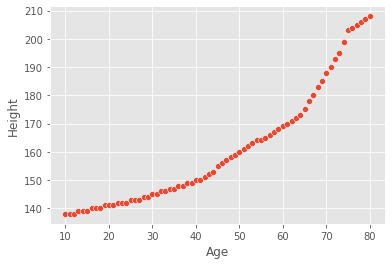

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.scatterplot(x = 'Age', y = 'Height', data=df)
# plt.savefig('scatterplot1.png')

we can see that height varies with age means both are dependent on each other... therefore we need a new variable that defines both together.... we will use standardscaler from sklearn

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc

StandardScaler()

In [8]:
X_scaled = sc.fit_transform(X)
X_scaled.shape

(71, 2)

In [9]:
import numpy as np
np.mean(X_scaled,axis=0)

array([3.12738880e-18, 2.50191104e-16])

In [10]:
np.std(X_scaled,axis=0)

array([1., 1.])

Now, you can see that mean is zero and the standard deviation is 1 for each variable in the X_scaled matrix.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=25)
pca

PCA(n_components=1, random_state=25)

In [12]:
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(71, 1)

now we have 1D X

In [13]:
pca.explained_variance_ratio_

array([0.97364162])

we need minimum 0.8 to avoid overfitting

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


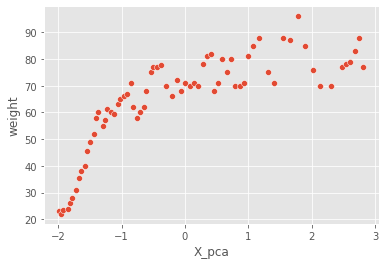

In [14]:
sns.scatterplot(X_pca.reshape(71,),y=y)
plt.xlabel('X_pca')
plt.ylabel('weight')
# plt.savefig('scatteplot2.png')

if we fit linear regression here it will give wrong predictions, therefore we will use polynomial regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4,include_bias=False)
poly_features

PolynomialFeatures(degree=4, include_bias=False)

In [16]:
X_poly = poly_features.fit_transform(X_pca)
X_poly.shape

(71, 4)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

Text(0, 0.5, 'weight')

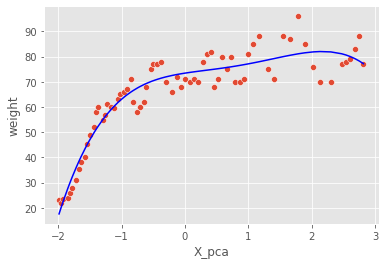

In [18]:
model.fit(X_poly,y)
y_pred = model.predict(X_poly)
sns.scatterplot(x = X_pca.reshape(71,),y=y)
plt.plot(X_pca.reshape(71,),y_pred, color= 'blue')
plt.xlabel('X_pca')
plt.ylabel('weight')

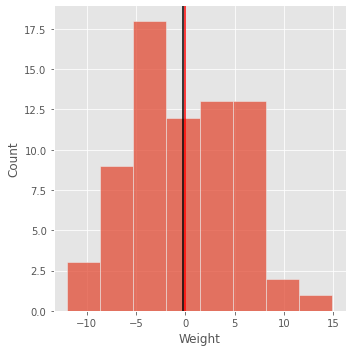

In [19]:
residuals = y - y_pred
sns.displot(residuals)
plt.axvline(x=np.mean(residuals),color = 'red', label = 'mean')
plt.axvline(x= np.median(residuals), color = 'black', label= 'median')
